In [15]:
#! pip install tensorflow
#! pip install scikit-learn




In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [17]:
train_df = pd.read_csv("train.csv")

In [18]:
# 대괄호 [ ] 제거
train_df['URL_clean'] = train_df['URL'].str.replace(r'[\[\]]', '', regex=True)
train_df["URL_clean"]

0                                         poznan.wuoz.gov.pl
1                                        vill.okawa.kochi.jp
2                                      nationalfinance.co.om
3                                     town.ozora.hokkaido.jp
4                          open24.ie-news.irish/online/Login
                                 ...                        
6995051                                           ddht.co.kr
6995052                                 www.upstartepoxy.com
6995053    employeesalaryschedule70.000webhostapp.com/adb...
6995054                                       dekalbtool.com
6995055                                   helpinganimals.com
Name: URL_clean, Length: 6995056, dtype: object

In [19]:
train_df

,ID,URL,label,URL_clean
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login
...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com


In [20]:
import re

# URL 전처리 (특징 생성)
train_df['digit_count'] = train_df['URL_clean'].str.count(r'\d')
train_df['dash_count'] = train_df['URL_clean'].str.count(r'-')
train_df['underscore_count'] = train_df['URL_clean'].str.count(r'_')
train_df['percent_count'] = train_df['URL_clean'].str.count(r'%')
train_df['equal_count'] = train_df['URL_clean'].str.count(r'=')
train_df['question_count'] = train_df['URL_clean'].str.count(r'\?')
train_df['at_count'] = train_df['URL_clean'].str.count(r'@')
train_df['is_ip_in_url'] = train_df['URL_clean'].apply(lambda x: bool(re.search(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', x)))
train_df['special_char_count'] = train_df['URL_clean'].str.count(r'[^a-zA-Z0-9]')
train_df['count_of_double_slash'] = train_df['URL_clean'].str.count(r'//')

# www 포함 여부
train_df['has_www'] = train_df['URL_clean'].str.contains('www')

# suspicious word 포함 여부
suspicious_words = ['login', 'verify', 'update', 'confirm', 'account', 'secure', 'ebayisapi', 'banking']
train_df['suspicious_word_count'] = train_df['URL_clean'].apply(
    lambda x: sum(word in x.lower() for word in suspicious_words)
)
# path 깊이
train_df['path_depth'] = train_df['URL_clean'].str.count(r'/') - 2

# 숫자 연속 등장 여부
train_df['has_long_digit_sequence'] = train_df['URL_clean'].str.contains(r'\d{4,}')
# 하이픈 연속 등장 여부
train_df['has_multiple_dash'] = train_df['URL_clean'].str.contains(r'-{2,}')


In [21]:
train_df

,ID,URL,label,URL_clean,digit_count,dash_count,underscore_count,percent_count,equal_count,question_count,at_count,is_ip_in_url,special_char_count,count_of_double_slash,has_www,suspicious_word_count,path_depth,has_long_digit_sequence,has_multiple_dash
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl,0,0,0,0,0,0,0,False,3,0,False,0,-2,False,False
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp,0,0,0,0,0,0,0,False,3,0,False,0,-2,False,False
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om,0,0,0,0,0,0,0,False,2,0,False,0,-2,False,False
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp,0,0,0,0,0,0,0,False,3,0,False,0,-2,False,False
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login,2,1,0,0,0,0,0,False,5,0,False,1,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr,0,0,0,0,0,0,0,False,2,0,False,0,-2,False,False
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com,0,0,0,0,0,0,0,False,2,0,True,0,-2,False,False
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...,5,0,0,0,0,0,0,False,4,0,False,0,0,False,False
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com,0,0,0,0,0,0,0,False,1,0,False,0,-2,False,False


In [22]:
# url 엔트로피 차수 저장 
import math

def calculate_entropy(url):
    probability = [url.count(c) / len(url) for c in set(url)]
    return -sum(p * math.log(p, 2) for p in probability)


In [23]:
train_df['url_entropy'] = train_df['URL_clean'].apply(calculate_entropy)

In [24]:
train_df

,ID,URL,label,URL_clean,digit_count,dash_count,underscore_count,percent_count,equal_count,question_count,at_count,is_ip_in_url,special_char_count,count_of_double_slash,has_www,suspicious_word_count,path_depth,has_long_digit_sequence,has_multiple_dash,url_entropy
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl,0,0,0,0,0,0,0,False,3,0,False,0,-2,False,False,3.308271
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp,0,0,0,0,0,0,0,False,3,0,False,0,-2,False,False,3.471354
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om,0,0,0,0,0,0,0,False,2,0,False,0,-2,False,False,3.272804
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp,0,0,0,0,0,0,0,False,3,0,False,0,-2,False,False,3.533771
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login,2,1,0,0,0,0,0,False,5,0,False,1,0,False,False,3.772450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr,0,0,0,0,0,0,0,False,2,0,False,0,-2,False,False,2.921928
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com,0,0,0,0,0,0,0,False,2,0,True,0,-2,False,False,3.684184
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...,5,0,0,0,0,0,0,False,4,0,False,0,0,False,False,4.130881
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com,0,0,0,0,0,0,0,False,1,0,False,0,-2,False,False,3.324863


In [25]:
S = train_df.drop(['URL', 'URL_clean','ID'], axis=1)  

In [26]:
y = train_df['label']
X = train_df.drop(['URL', 'URL_clean', 'label', 'ID'], axis=1, errors='ignore')  
print(X)
print(y)


         digit_count  dash_count  underscore_count  percent_count  \
0                  0           0                 0              0   
1                  0           0                 0              0   
2                  0           0                 0              0   
3                  0           0                 0              0   
4                  2           1                 0              0   
...              ...         ...               ...            ...   
6995051            0           0                 0              0   
6995052            0           0                 0              0   
6995053            5           0                 0              0   
6995054            0           0                 0              0   
6995055            0           0                 0              0   

         equal_count  question_count  at_count  is_ip_in_url  \
0                  0               0         0         False   
1                  0               0       

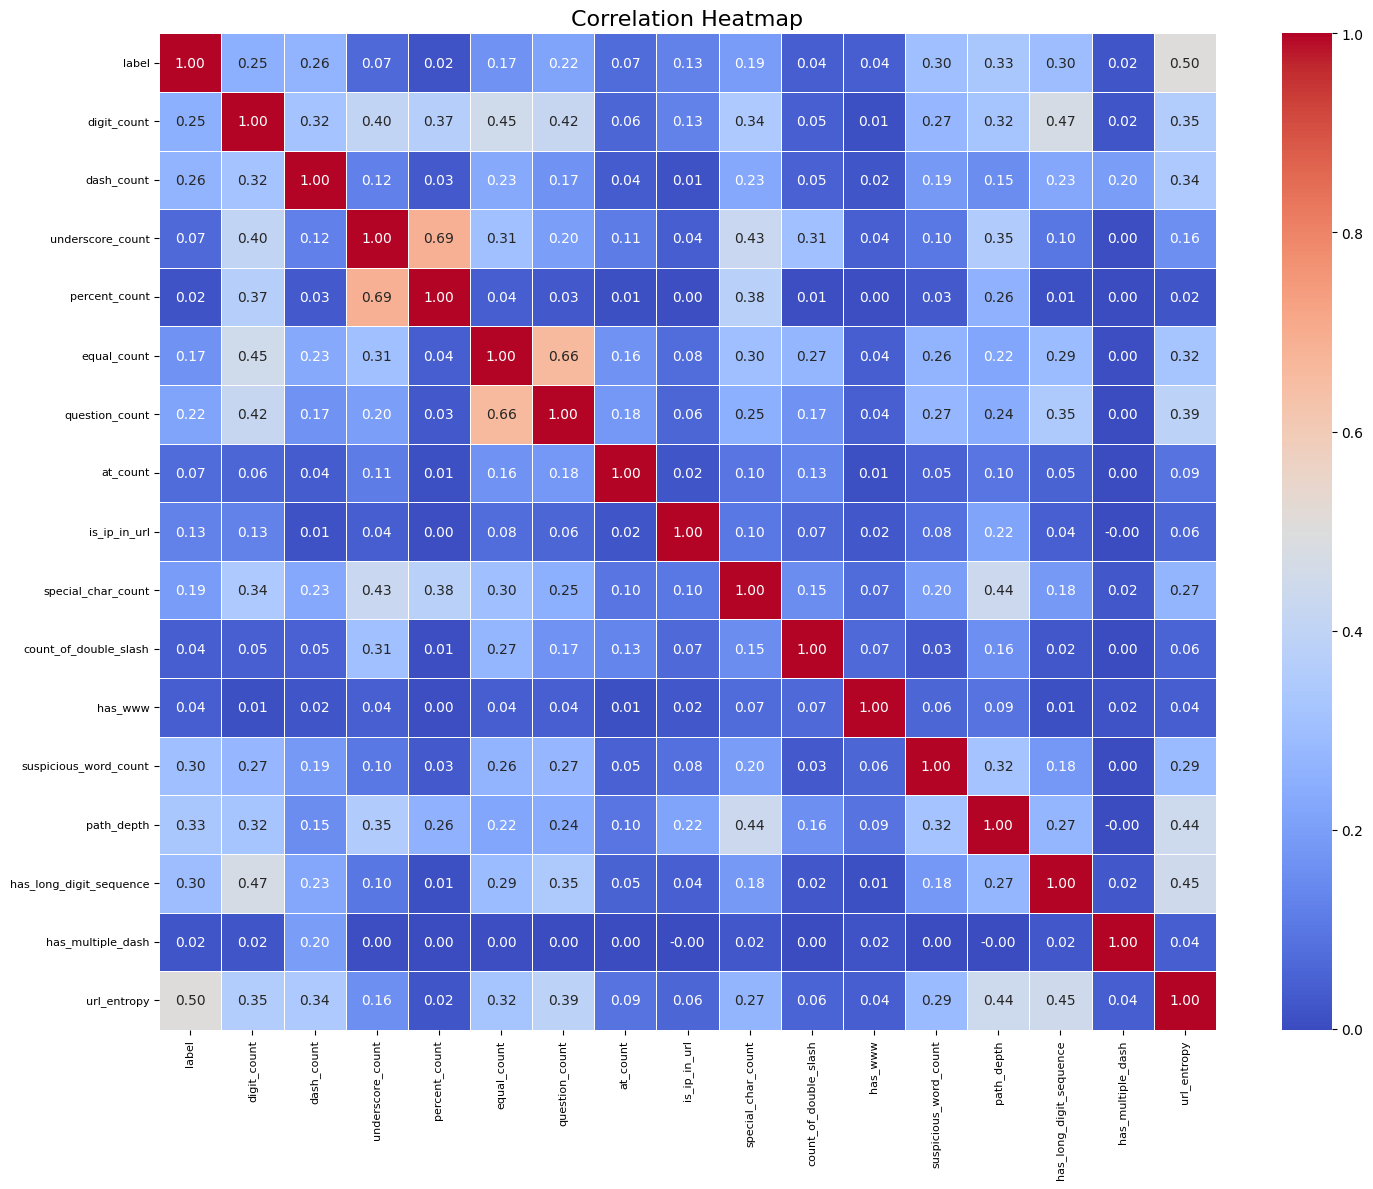

In [27]:
S.corr()
# 상관계수 행렬 계산
corr_matrix = S.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 12))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# y_train의 클래스 분포 시각화
plt.figure(figsize=(6,4))
plt.bar(*zip(*Counter(y).items()))  # y_train의 클래스 값과 빈도수로 막대 그래프
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in y')
plt.show()


In [50]:
# from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# # 2단계: 훈련셋에서 검증셋 분리
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
# )


# # 동일 기준으로 필터링 적용
# X_train_filtered = train_df.loc[:, ~high_zero_cols]
# X_val_filtered   = X_val_df.loc[:, ~high_zero_cols]
# X_test_filtered  = X_test_df.loc[:, ~high_zero_cols]

# # 6. 스케일링
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_filtered)
# X_val_scaled   = scaler.transform(X_val_filtered)
# X_test_scaled  = scaler.transform(X_test_filtered)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구성 
model = Sequential()
model.add(Dense(64, input_dim=16, activation='relu')) # 첫번째 은닉층  노드 64개  input_dim=X_train.shape[1]: 입력피처 개수 설정 
model.add(Dense(32, activation='relu')) # 이진분류  두번쨰 은닉층 
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\human\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# EarlyStopping 콜백을 사용하여 검증 손실이 개선되지 않으면 학습을 멈추도록 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [31]:
# X_val = pd.DataFrame(X_val, columns=X_numeric.columns)
# # high_zero_cols를 X_val에 맞춰 정렬
# high_zero_cols_aligned = high_zero_cols.reindex(X_val.columns, fill_value=False)
# # 재정렬된 기준으로 희소 컬럼 제거
# X_val_filtered = X_val.loc[:, ~high_zero_cols_aligned]


In [33]:
# from imblearn.under_sampling import RandomUnderSampler

# # 언더샘플링 적용
# rus = RandomUnderSampler(random_state=42)

# # X_train과 y_train을 언더샘플링하여 균형 맞추기
# X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# # 언더샘플링 후 클래스 분포 확인
# print("After undersampling:", Counter(y_train_under))

In [34]:
# # 언더샘플링 후 클래스 분포 시각화
# plt.figure(figsize=(6,4))
# plt.bar(*zip(*Counter(y_train_under).items()))  # 이게 핵심!
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# plt.title('Class Distribution in y_train (after undersampling)')
# plt.show()


In [54]:
from sklearn.utils import class_weight


# 클래스 가중치 계산 (불균형 보정)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(zip(np.unique(y_train), weights))

# 모델 학습 (스케일링된 데이터 사용 + 클래스 가중치 적용)
history = model.fit(
    X_train, y_train,                   # ← 스케일링된 훈련 데이터
    epochs=10,
    batch_size=256,
)

# 모델 평가
from sklearn.metrics import accuracy_score
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f'Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8761 - loss: 0.3071
Epoch 2/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8840 - loss: 0.2921
Epoch 3/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8852 - loss: 0.2902
Epoch 4/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8859 - loss: 0.2888
Epoch 5/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8866 - loss: 0.2877
Epoch 6/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8871 - loss: 0.2872
Epoch 7/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.8870 - loss: 0.2869
Epoch 8/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8880 - loss: 0.2855
Epoch 9/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8877 - loss: 0.2859
Epoch 10/10
21860/21860 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8881 - loss: 0.2853
43720/43720 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - accuracy: 0.8882 - loss: 0.2849
Validatio

In [ ]:
# 검증 데이터에 대한 예측 확률을 먼저 계산 
y_train_proba = model.predict(X_train)

174877/174877 ━━━━━━━━━━━━━━━━━━━━ 136s 778us/step


In [56]:
from sklearn.metrics import f1_score, accuracy_score

f1_scores = []
accuracies = []
thresholds = []


# threshold 범위 0.00 ~ 0.99
for t in [i * 0.01 for i in range(100)]:
    y_pred = (y_train_proba > t).astype(int)
    try:
        f1 = f1_score(y_train, y_pred)
        acc = accuracy_score(y_train, y_pred)

        thresholds.append(t)
        f1_scores.append(f1)
        accuracies.append(acc)
    except:
        continue


In [57]:
# 최고 F1 점수 기준 인덱스
best_idx = f1_scores.index(max(f1_scores))
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_acc = accuracies[best_idx]  

print(f"Best Threshold: {best_threshold:.2f}")

print(f"Best F1 Score: {best_f1:.4f}")
print(f"Accuracy at Best Threshold: {best_acc:.4f}")

Best Threshold: 0.37
Best F1 Score: 0.7306
Accuracy at Best Threshold: 0.8806


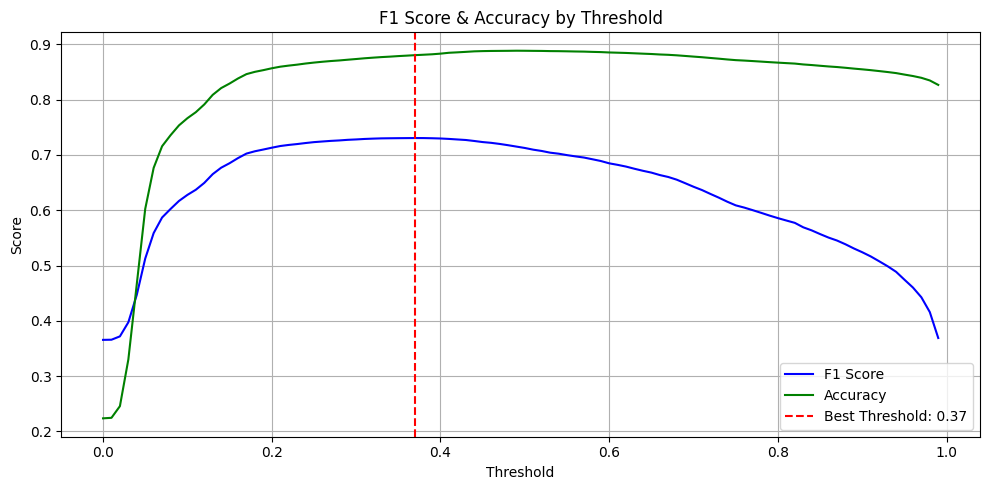

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:0.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1 Score & Accuracy by Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# #  테스트 데이터 확률 예측 (스케일링된 데이터 사용!)
# y_test_proba = model.predict(X_test).ravel()

# #  최적 threshold로 이진 분류
# y_test_pred = (y_test_proba > best_threshold).astype(int)


In [59]:
# 1. 테스트 데이터 확률 예측
y_test_proba = model.predict(X_test) 

# 2. 확률을 threshold 기준으로 0/1 변환
y_test_pred = (y_test_proba > 0.37).astype(int)

# 3. 정확도 및 AUC 계산
from sklearn.metrics import accuracy_score, roc_auc_score

print(f"Test Accuracy (threshold={best_threshold:.2f}):", accuracy_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))


43720/43720 ━━━━━━━━━━━━━━━━━━━━ 32s 727us/step
Test Accuracy (threshold=0.37): 0.8817000854889022
Test ROC AUC: 0.901789635724033


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92   1086032
           1       0.75      0.72      0.73    312980

    accuracy                           0.88   1399012
   macro avg       0.83      0.82      0.83   1399012
weighted avg       0.88      0.88      0.88   1399012



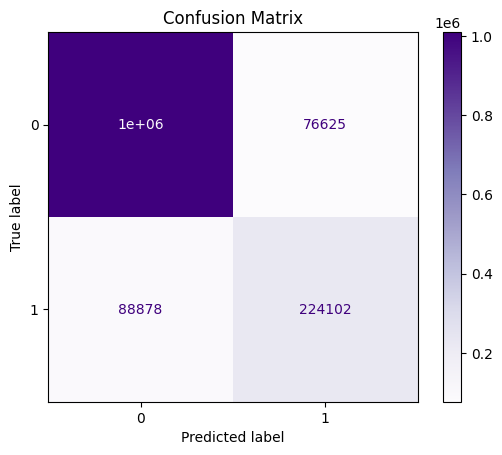

In [60]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay




# 평가 지표 출력
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Purples')
plt.title("Confusion Matrix")
plt.show()
